<a href="https://colab.research.google.com/github/dinesh6351/Cat_Dog_Classifier_ML/blob/main/Cat_vs_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !create the token and download Kaggle file
# copy api comment in kaggle in dog vs cat

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:48<00:00, 24.3MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.6MB/s]


In [3]:
# unzip the folder
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# Generators --> convert large amount of data to small batch  --> run one by one batch in RAM
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',  #cat =0,dog=1
    batch_size=32,
    image_size=(256,256),
)

validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',  #cat =0,dog=1
    batch_size=32,
    image_size=(256,256),
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# the data store in numpy array to store  0 to 256
# so use Normailze the data (0 to 1 based pixel)
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


In [7]:
# create CNN Model
# add filter in 3 layers

model = Sequential()
# 32 filter, kernal size means filter size,
# first convension LAyer

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
# 128 neuron ,64,1 neuron
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 105ms/step - loss: 1.1744 - accuracy: 0.5962 - val_loss: 0.6293 - val_accuracy: 0.6378
Epoch 2/10
625/625 [==============================] - 68s 107ms/step - loss: 0.5312 - accuracy: 0.7369 - val_loss: 0.5818 - val_accuracy: 0.7236
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4388 - accuracy: 0.8002 - val_loss: 0.4567 - val_accuracy: 0.7962
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3914 - accuracy: 0.8260 - val_loss: 0.4809 - val_accuracy: 0.8020
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3036 - accuracy: 0.8713 - val_loss: 1.9046 - val_accuracy: 0.5848
Epoch 6/10
625/625 [==============================] - 63s 101ms/step - loss: 0.2270 - accuracy: 0.9064 - val_loss: 0.6625 - val_accuracy: 0.8070
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.1530 - accuracy: 0.9412 - val_loss: 0.5029 - val_ac

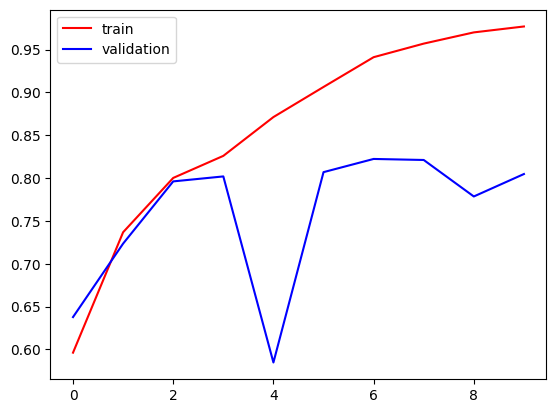

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

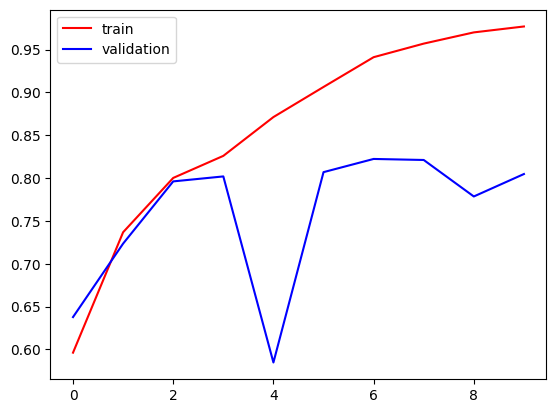

In [12]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

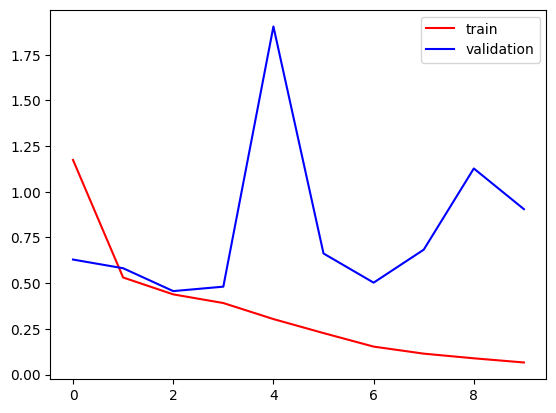

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

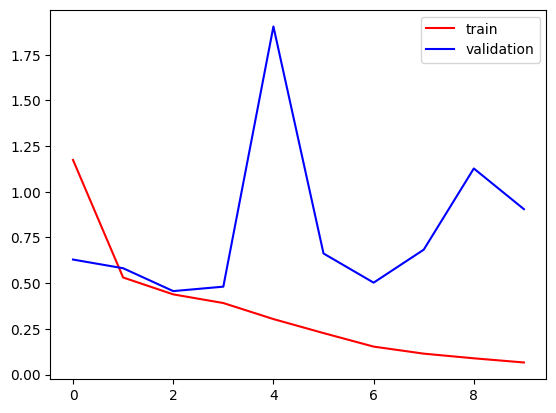

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [16]:
import cv2

In [17]:
test_img1 = cv2.imread('/content/cat.jpg')
test_img2= cv2.imread('/content/dog.jpg')

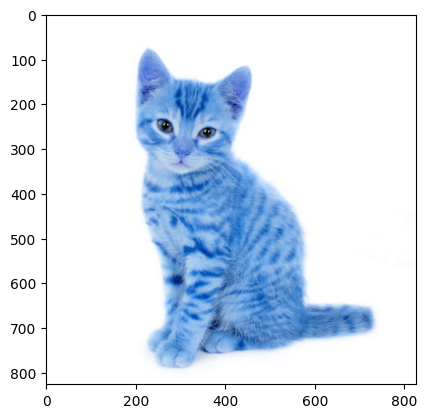

In [18]:
plt.imshow(test_img1)

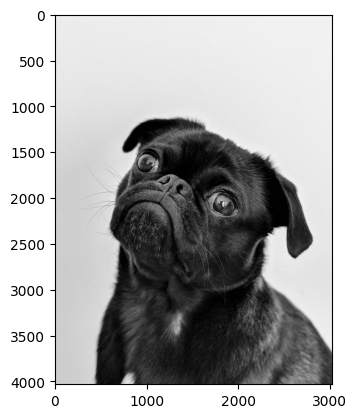

In [19]:
plt.imshow(test_img2)


In [20]:
test_img1 = cv2.resize(test_img1,(256,256))

In [21]:
test_img2 = cv2.resize(test_img2,(256,256))


In [22]:
test_input1 = test_img1.reshape((1,256,256,3))

In [23]:
test_input2 = test_img2.reshape((1,256,256,3))


In [24]:
model.predict(test_input1)

1/1 [==============================] - 0s 408ms/step


array([[0.]], dtype=float32)

In [27]:
model.predict(test_input2)


1/1 [==============================] - 0s 25ms/step


array([[1.]], dtype=float32)